## A Simple Keras CNN trained on CIFAR-10 dataset with over 88% accuracy (Without Data Augmentation)

CIFAR-10 definition taken from Wikipedia: 
 
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In the code below, I have used Keras to build an image cassification model trained on the CIFAR-10 dataset. It uses the following layers/functions:
* **For building the Model** - CNN, Maxpooling and Dense Layers.
* **For Activation Function** - ReLU (in CNN layers for handling image pixels) and Softmax (for final classification).
* **For handling Overfitting (Regularizing)** - DropOut Layer.
* **For normalizing/standardizing the inputs between the layers (within the network)** and hence accelerating the training, providing regularization and reducing the generalization error - Batch Normalization Layer.

### Table of Content
   1. [Importing Dependencies](#section-one)
   2. [Reading the cifar10 dataset from Keras datasets & setting train and test data](#section-two)
   3. [Some EDA](#section-three)
   4. [Data Preprocessing](#section-four)
   5. [Building the CNN Model using Keras](#section-five) 
*       5.1 [Setting up Layers](#section-six)
*       5.2 [Compiling the Model](#section-seven)
*       5.3 [Fitting the Model](#section-eight)
   6. [Visualizing the Evaluation](#section-nine)
   7. [Predicting the Results](#section-ten)


<a id="section-one"></a>
## Importing Dependencies

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

<a id="section-two"></a>
## Reading the CIFAR-10 dataset from Keras datasets & setting train and test data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

<a id="section-three"></a>
## EDA (Exploratory Data Analysis)

In [3]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

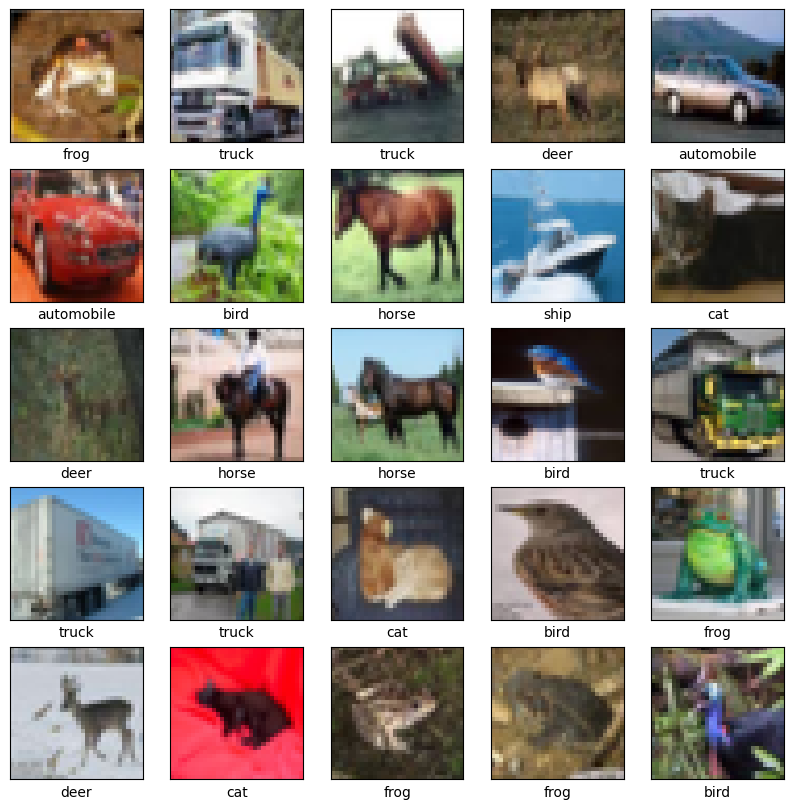

In [6]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

<a id="section-four"></a>
## Data Preprocessing

* The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
* The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
* The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.


In [7]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

<a id="section-five"></a>
## Building the CNN Model using Keras

<a id="section-six"></a>
### Setting up the Layers

In [8]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

<a id="section-seven"></a>
### Compiling the Model 
* Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
* Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
* Metrics used for evaluation - Accuracy.

In [9]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

<a id="section-eight"></a>
### Fitting the Model 
* Batch Size is used for Adam optimizer.
* Epochs - One epoch is one complete cycle (forward pass + backward pass).

In [10]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
121/782 [===>..........................] - ETA: 3:09 - loss: 2.5258 - accuracy: 0.2357

KeyboardInterrupt: 

<a id="section-nine"></a>
## Visualizing the Evaluation

* Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
* Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.

Text(0.5, 1.0, 'Loss Curves')

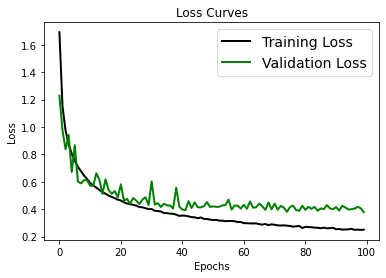

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

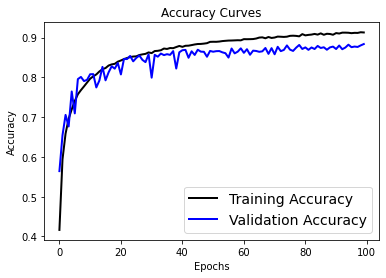

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

<a id="section-ten"></a>
## Predicting the Result

Here is the fun part. Let's take 25 images from the testing data and see how many of it we predicted correctly. 

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[9.02955037e-07 1.10161686e-07 3.55907578e-05 ... 1.27035221e-07
  4.62382985e-07 4.90620566e-09]
 [4.52054508e-07 2.89667863e-04 6.06759651e-12 ... 1.01418812e-13
  9.99709785e-01 9.56176081e-08]
 [4.56944363e-05 5.59799932e-02 4.10689063e-06 ... 1.63303739e-07
  9.43750322e-01 2.15537628e-04]
 ...
 [1.32850317e-07 4.05991756e-08 1.79748633e-04 ... 2.29636971e-05
  1.94655939e-07 2.62900699e-07]
 [1.97271758e-04 9.99089003e-01 4.85149612e-05 ... 2.37959339e-05
  6.87262127e-06 3.44240048e-04]
 [4.14767376e-09 3.87196053e-09 3.81527201e-08 ... 9.99952435e-01
  6.56257271e-10 1.39900247e-09]]
[3 8 8 ... 5 1 7]


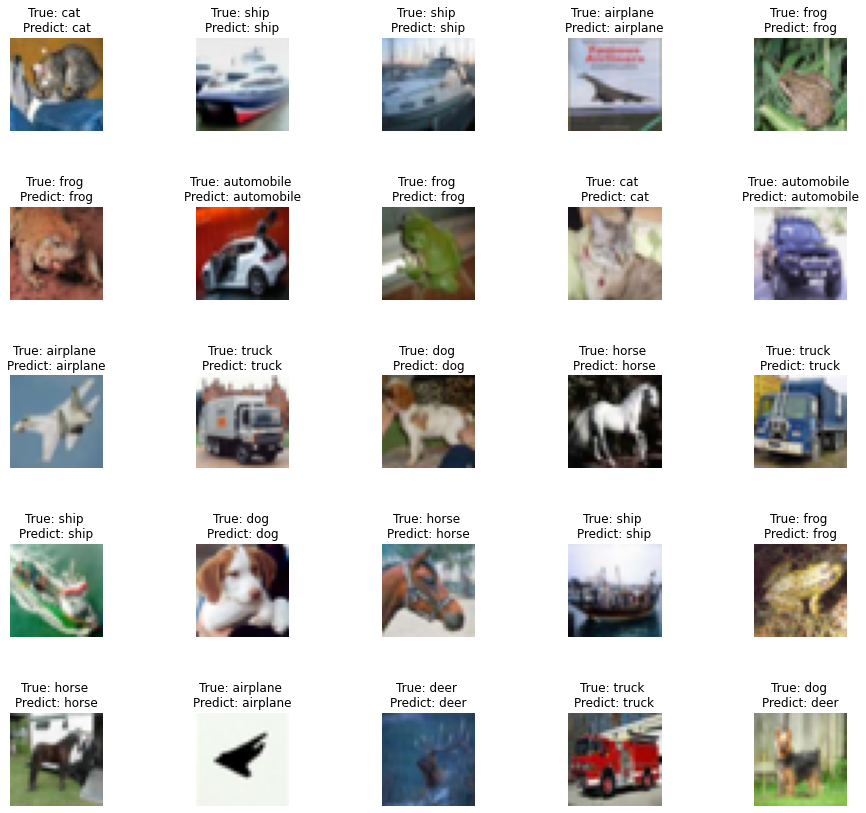

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [16]:
import tensorflow as tf
from keras.models import load_model
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Load the model
loaded_model = load_model('./model/cifar10-88.h5')

In [17]:
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels)
# 313 steps per epoch = 10000/32 (batch_size = 32 by default)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 10s 29ms/step - loss: 0.3789 - accuracy: 0.8838
test_loss :  0.37890422344207764 
test_acc :  0.8838000297546387
